## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Import the Data

In [2]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data cleaning

In [3]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no nulls in the data. Yay!!

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
data.describe()
# A quick description of the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Seperating predictors and response variable

In [6]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## Encoding the data

Since all the columns in our are categorical vaiables, it is importat to convert the data into numerical values using One hot encoding. But before doing One hot encoding, lets first use label encoding on the data to check the correlations

In [7]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder() 
for col in data:
    data[col] = Encoder.fit_transform(data[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Correlations

In [8]:
from IPython.display import display
pd.options.display.max_columns = None
data_corr = data.astype(float).corr()  
display(data_corr)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


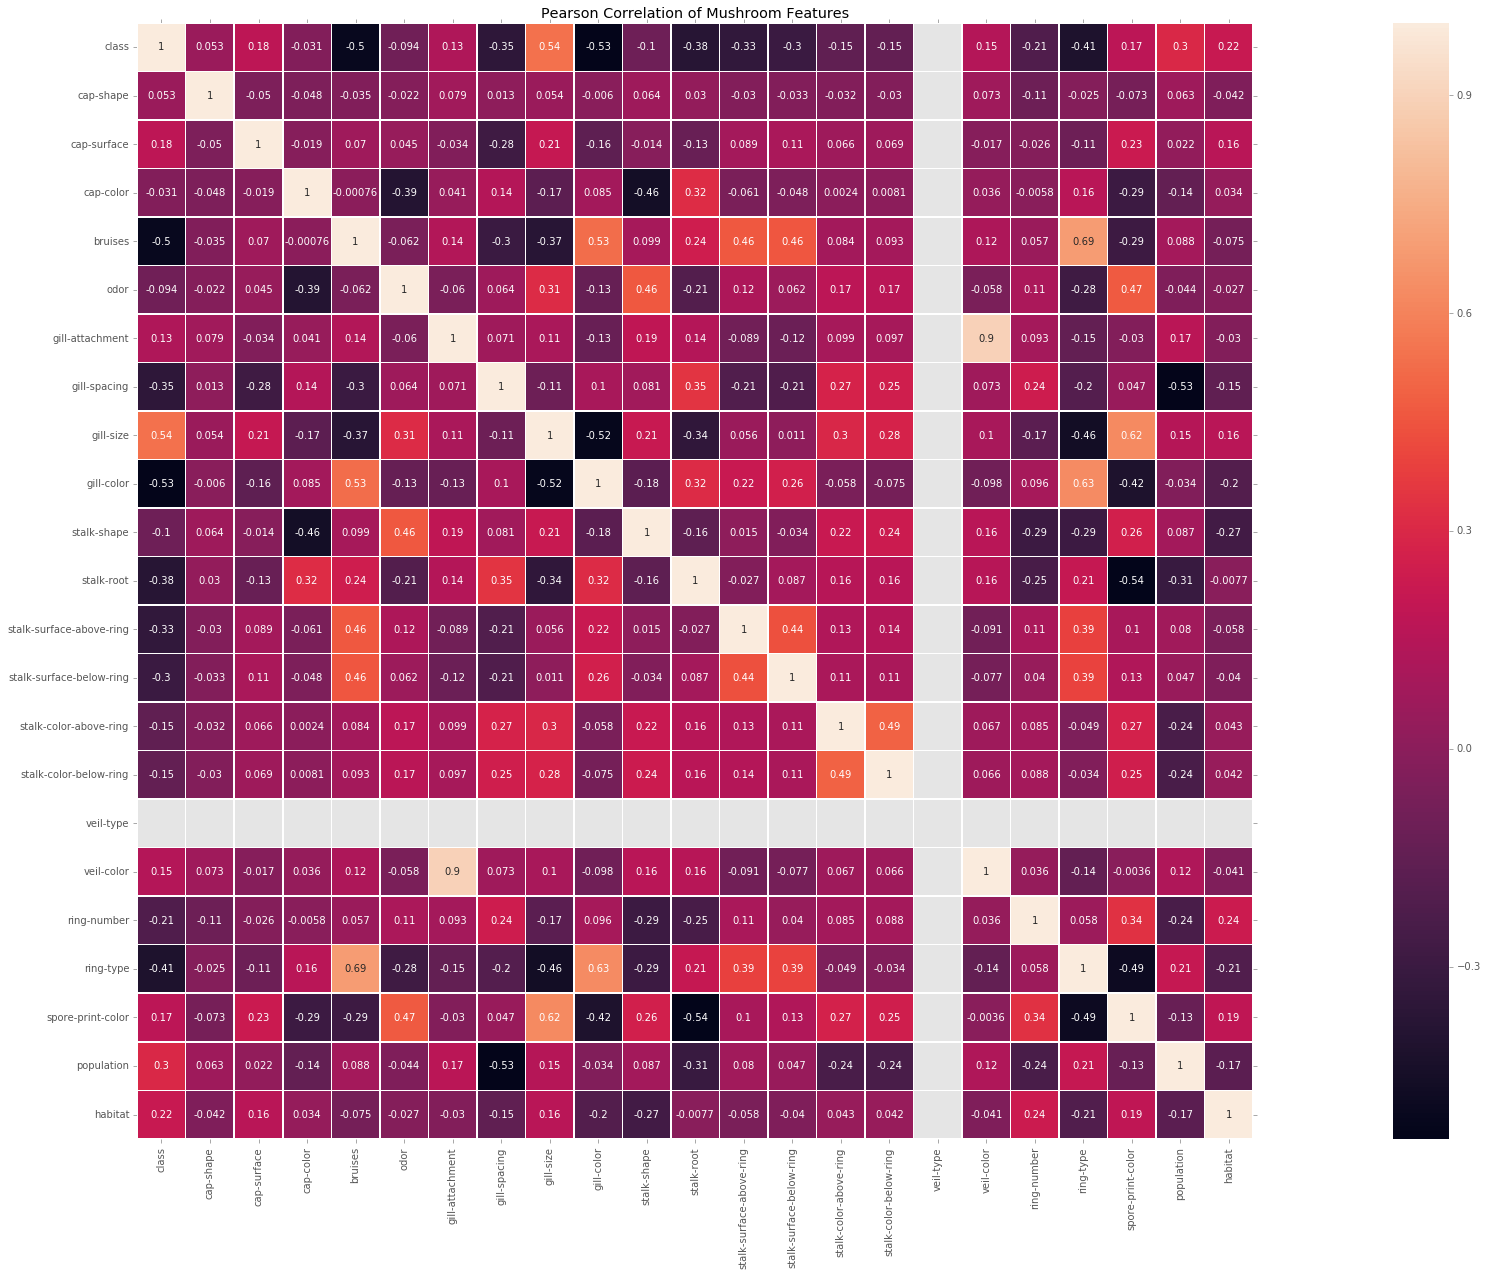

In [9]:
f, ax = plt.subplots(figsize=(50, 20))
plt.title('Pearson Correlation of Mushroom Features')
# Draw the heatmap using seaborn
sns.heatmap(data.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, annot=True)

In [10]:
correlations=data.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
8,"(gill-attachment, veil-color)",0.897518
0,"(bruises, ring-type)",0.692973
5,"(gill-color, ring-type)",0.629398
6,"(gill-size, spore-print-color)",0.622991
1,"(class, gill-size)",0.540024
4,"(spore-print-color, stalk-root)",-0.536996
2,"(class, gill-color)",-0.530566
9,"(gill-spacing, population)",-0.529253
3,"(bruises, gill-color)",0.527120
10,"(gill-color, gill-size)",-0.516736


In [11]:
corr=data.corr()["class"]
corr[np.argsort(corr, axis=0)[::-1]]

class                       1.000000
gill-size                   0.540024
spore-print-color           0.171961
population                  0.298686
cap-surface                 0.178446
ring-type                  -0.411771
habitat                     0.217179
veil-type                        NaN
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
veil-color                  0.145142
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-number                -0.214366
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

In [12]:
correlations=data.corr()
attrs = correlations.iloc[data.columns != 'class',data.columns != 'class'] # all except target
attrs

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,-0.163422,0.015193,-0.034399,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


 From the above graphs we see that quite a few variables are correlated with each other. So lets use principal component analysis to reduce the dimensionality.

## Splitting the data into train and test sets

In [13]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.shape

(8124, 95)

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
y_test.shape

(2438L,)

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#X=data.values

#Scaling the values
X_train = scale(X_train)
X_test=scale(X_test)

pca = PCA(n_components=95)

pca.fit(X_train)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print var1


[   9.41   16.6    22.61   28.39   33.45   38.1    41.66   45.04   47.55
   49.83   52.01   54.08   56.06   57.68   59.27   60.73   62.18   63.56
   64.92   66.19   67.44   68.64   69.82   71.     72.14   73.27   74.35
   75.41   76.47   77.52   78.52   79.5    80.44   81.36   82.26   83.14
   84.01   84.86   85.69   86.48   87.23   87.96   88.66   89.32   89.97
   90.62   91.24   91.83   92.4    92.96   93.51   94.05   94.56   95.06
   95.54   96.01   96.45   96.85   97.22   97.57   97.9    98.2    98.47
   98.73   98.95   99.14   99.31   99.42   99.52   99.59   99.66   99.72
   99.77   99.82   99.87   99.91   99.94   99.97   99.99  100.01  100.03
  100.04  100.04  100.04  100.04  100.04  100.04  100.04  100.04  100.04
  100.04  100.04  100.04  100.04  100.04]


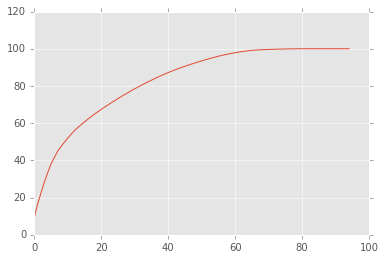

In [17]:
plt.plot(var1)

In [18]:
#Looking at above plot I'm taking 60 variables
pca = PCA(n_components=20)
pca.fit(X_train)
X1_train=pca.transform(X_train)
X1_test=pca.transform(X_test)
print X1_train.shape
print X1_test.shape


(5686L, 20L)
(2438L, 20L)


## Model building

Let's write a function to evaluate a model's performance which will be handy later on

In [19]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
       
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
pca=[10,20,30,40,50,60]
for pc in pca:
    print(pc)
    pca = PCA(n_components=pc)
    pca.fit(X_train)
    X1_train=pca.fit_transform(X_train)
    X1_test=pca.transform(X_test)
    classifier = LogisticRegression()
    classifier.fit(X1_train,y_train)
    print_score(classifier,X1_train,y_train,X1_test,y_test,train=True)
    print_score(classifier,X1_train,y_train,X1_test,y_test,train=False)

10
Training results:

Accuracy Score: 0.9613

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      2951
          1       0.96      0.96      0.96      2735

avg / total       0.96      0.96      0.96      5686


Confusion Matrix:
[[2831  120]
 [ 100 2635]]

Test results:

Accuracy Score: 0.9557

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1257
          1       0.96      0.95      0.95      1181

avg / total       0.96      0.96      0.96      2438


Confusion Matrix:
[[1210   47]
 [  61 1120]]

20
Training results:

Accuracy Score: 0.9986

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2951
          1       1.00      1.00      1.00      2735

avg / total       1.00      1.00      1.00      5686


Confusion Matrix:
[[2947    4]
 [   4 2731]]

Test results:


Based on above analysis pca=20 components

In [22]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV(cv=10)
classifier.fit(X1_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
print_score(classifier,X1_train,y_train,X1_test,y_test,train=True)

Training results:

Accuracy Score: 0.9996

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2951
          1       1.00      1.00      1.00      2735

avg / total       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   2 2733]]



In [24]:
print_score(classifier,X1_train,y_train,X1_test,y_test,train=False)

Test results:

Accuracy Score: 0.9996

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1257
          1       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   1 1180]]



Let's check for overfitting

In [25]:
from sklearn.cross_validation import KFold 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
kf = KFold(len(y), 10) 
for train, test in kf:    
    X_train,X_test = X.iloc[train],X.iloc[test]
    y_train, y_test = y[train], y[test]
    X_train = scale(X_train)
    X_test=scale(X_test)
    pca = PCA(n_components=20)
    pca.fit(X_train)
    X1_train=pca.fit_transform(X_train)
    X1_test=pca.transform(X_test)    
    classifier = LogisticRegression()
    classifier.fit(X1_train,y_train)
    print_score(classifier,X1_train,y_train,X1_test,y_test,train=True)

Training results:

Accuracy Score: 0.9977

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3479
          1       1.00      1.00      1.00      3832

avg / total       1.00      1.00      1.00      7311


Confusion Matrix:
[[3470    9]
 [   8 3824]]

Training results:

Accuracy Score: 0.9996

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3505
          1       1.00      1.00      1.00      3806

avg / total       1.00      1.00      1.00      7311


Confusion Matrix:
[[3505    0]
 [   3 3803]]

Training results:

Accuracy Score: 0.9993

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3463
          1       1.00      1.00      1.00      3848

avg / total       1.00      1.00      1.00      7311


Confusion Matrix:
[[3461    2]
 [   3 3845]]

Training results

We see that the results vary quite a bit with respect to the data and this confirms that there is overitting. Let's tune the parameters of logistic regression to battle overfitting.

## Tuned Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

LR_model= LogisticRegression()

tuned_parameters = {'C': [ 0.0001,0.001,0.01,0.1,1, 10, 100, 1000,10000] ,
              'penalty':['l1','l2']
                   }

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR.fit(X1_train,y_train)
print LR.best_params_



In [337]:
LR_model2=LogisticRegression(penalty='l1',C=1)
LR_model2.fit(X1_train,y_train)
y_prob = LR_model2.predict_proba(X1_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
confusion_matrix_test=metrics.confusion_matrix(y_test,y_pred)
print confusion_matrix

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,LR_model2.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,LR_model2.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,LR_model2.predict(X1_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,LR_model2.predict(X1_test))))



[[355   4]
 [  1 452]]
Accuracy Score: 0.9997

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3849
          1       1.00      1.00      1.00      3463

avg / total       1.00      1.00      1.00      7312


Accuracy Score: 0.9938

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       359
          1       0.99      1.00      0.99       453

avg / total       0.99      0.99      0.99       812




## Naive Bayes Classifier

In [338]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X1_train, y_train)
y_prob = model_naive.predict_proba(X1_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [339]:
print("Number of mislabeled points from %d points : %d"
      % (X1_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 812 points : 21


In [344]:
print accuracy_score(y_train,model_naive.predict(X1_train))

print accuracy_score(y_test,model_naive.predict(X1_test))

0.975246170678
0.974137931034


In [345]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[338,  21],
       [  0, 453]])

In [346]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.94      0.97       359\n          1       0.96      1.00      0.98       453\n\navg / total       0.98      0.97      0.97       812\n'

In [347]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.97075208913649025

## Support Vector Machines

### Trying the default model



In [357]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X1_train,y_train)

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X1_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X1_test))))

confusion_matrix=metrics.confusion_matrix(y_test,classifier.predict(X1_test))
confusion_matrix
   

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3849
          1       1.00      1.00      1.00      3463

avg / total       1.00      1.00      1.00      7312


Accuracy Score: 0.9667

Classification Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       359
          1       1.00      0.94      0.97       453

avg / total       0.97      0.97      0.97       812




array([[359,   0],
       [ 27, 426]])

## Support Vector Machines with tuned Parameters

In [358]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf','poly'],
 'gamma': [1,0.1,0.01,0.001, 0.0001],'degree': [2,3,4,5,6] }

In [359]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.svm import SVC

svm_model= SVC()
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)
model_svm.fit(X1_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 10, 100, 500, 1000], 'degree': [2, 3, 4, 5, 6], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [360]:
print(model_svm.best_params_)

{'kernel': 'linear', 'C': 1, 'degree': 6, 'gamma': 0.01}


In [361]:
y_pred= model_svm.predict(X1_test)
print(metrics.accuracy_score(y_pred,y_test))

0.993842364532


In [362]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[355,   4],
       [  1, 452]])

## Decision Tree Model

### Default model

In [363]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [364]:
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,model_tree.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,model_tree.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,model_tree.predict(X1_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,model_tree.predict(X1_test))))

confusion_matrix=metrics.confusion_matrix(y_test,model_tree.predict(X1_test))
confusion_matrix
   

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3849
          1       1.00      1.00      1.00      3463

avg / total       1.00      1.00      1.00      7312


Accuracy Score: 0.9667

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       359
          1       0.97      0.97      0.97       453

avg / total       0.97      0.97      0.97       812




array([[344,  15],
       [ 12, 441]])

## Decision Trees with tuned parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(10,100,10) , 'max_depth': range(10,50,10)
                  }

In [ ]:
from sklearn.grid_search import GridSearchCV
DT_model= GridSearchCV(model_DT, tuned_parameters,cv=10,scoring='accuracy',n_jobs= -1)

In [ ]:
DT_model.fit(X1_train, y_train)

In [382]:
DT_model.best_params_
y_prob = DT_model.predict_proba(X1_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

In [383]:
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,DT_model.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,DT_model.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test,y_pred)))

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

Accuracy Score: 0.9865

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3849
          1       0.99      0.98      0.99      3463

avg / total       0.99      0.99      0.99      7312


Accuracy Score: 0.8362

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.67      0.78       359
          1       0.79      0.97      0.87       453

avg / total       0.86      0.84      0.83       812




array([[239, 120],
       [ 13, 440]])

## Random Forest Model 
### Lets first try the default model

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

model_RR.fit(X1_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,model_RR.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,model_RR.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,model_RR.predict(X1_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,model_RR.predict(X1_test))))

confusion_matrix=metrics.confusion_matrix(y_test,model_RR.predict(X1_test))
confusion_matrix

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3849
          1       1.00      1.00      1.00      3463

avg / total       1.00      1.00      1.00      7312


Accuracy Score: 0.9643

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.92      0.96       359
          1       0.94      1.00      0.97       453

avg / total       0.97      0.96      0.96       812




array([[331,  28],
       [  1, 452]])

## Tuning parameters for Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }


In [25]:
from sklearn.grid_search import GridSearchCV

RR_model= GridSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_jobs= -1)
RR_model.fit(X1_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [26]:
print(RR_model.best_score_)

0.9522702407


In [27]:
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,RR_model.predict(X1_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,RR_model.predict(X1_train))))

print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,RR_model.predict(X1_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,RR_model.predict(X1_test))))

confusion_matrix=metrics.confusion_matrix(y_test,RR_model.predict(X1_test))
confusion_matrix

Accuracy Score: 0.9990

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3849
          1       1.00      1.00      1.00      3463

avg / total       1.00      1.00      1.00      7312


Accuracy Score: 0.9483

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94       359
          1       0.92      1.00      0.96       453

avg / total       0.95      0.95      0.95       812




array([[319,  40],
       [  2, 451]])

In [28]:
RR_model.best_params_

{'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 10}

In [ ]:
import xgboost
from sklearn.grid_search import GridSearchCV
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='accuracy')
gsearch1.fit(X1_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  1.6min
